# Coverage Guided Fuzzer
### Smarter way to create fuzzed input for python program

#### Steps to create the fuzzer

1. We maintain a population (i.e., a list of seeds) that we use for mutation. Each seed in the population will be an input that provide additional coverage information.
2. We will take a seed from the population and fuzz the seed to test the program. If the population is empty, we mutate an initial seed that we provide manually.
3. We take the seed from the population semi-randomly, but the seeds that provided more additional coverage have a higher chance of being selected.
4. If the new input increased the coverage, we add this new input to the population as a new seed. We assign a score to the seed (i.e., how much coverage it improved).
5. We repeat and go back to Step 2 until we execute the fuzzer 100 times (i.e., your pre-defined number of trials).

#### Testing the fuzzer

+  We run our fuzzer on 3 Python programs
    - Differentiate network using Subnet
    - Credit Card Validation
    - RSA Encryption
    
+ Evaluate the programs on different fuzzing approaches and on the fuzzer we wrote
+ We discuss and compare each fuzzing approach in terms of coverage.
+ We plot how the coverage increases for the inputs that we tried.
+ We also record any bug found in our program.

## References

1. https://github.com/geekcomputers/Python


# Subnet Calculator

#### Description: 

+ This program calculates the network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet from the given IP address and subnet mask.

#### Input: The program takes 2 inputs- 

+ String- IP Address
+ String- Subnet mask

#### Output: 

+ Prints the calculated network address, broadcast address, wildcard mask, number of host bits and number of hosts/subnet.
+ If the given IP Address or Subnet mask is invalid, the program will end. 

In [151]:
import random
import sys
def subnet_calc(ip_address, subnet_mask):

        #Checking IP address validity
    while True:

            #Checking octets            
        a = ip_address.split('.')

        if (len(a) == 4) and (1 <= int(a[0]) <= 223) and (int(a[0]) != 127) and (int(a[0]) != 169 or int(a[1]) != 254) and (0 <= int(a[1]) <= 255 and 0 <= int(a[2]) <= 255 and 0 <= int(a[3]) <= 255):
            break

        else:
            raise ValueError("Invalid IP Address")
            

    masks = [255, 254, 252, 248, 240, 224, 192, 128, 0]

        #Checking Subnet Mask validity
    while True:

            #Checking octets            
        b = subnet_mask.split('.')

        if (len(b) == 4) and (int(b[0]) == 255) and (int(b[1]) in masks) and (int(b[2]) in masks) and (int(b[3]) in masks) and (int(b[0]) >= int(b[1]) >= int(b[2]) >= int(b[3])):
            break

        else:
            raise ValueError("Invalid subnet Mask")

	############# Application #1 - Part #2 #############

        #Algorithm for subnet identification, based on IP and Subnet Mask

        #Convert mask to binary string
    mask_octets_padded = []
    mask_octets_decimal = subnet_mask.split(".")
        #print mask_octets_decimal

    for octet_index in range(0, len(mask_octets_decimal)):

            #print bin(int(mask_octets_decimal[octet_index]))

        binary_octet = bin(int(mask_octets_decimal[octet_index])).split("b")[1]
            #print binary_octet

        if len(binary_octet) == 8:
            mask_octets_padded.append(binary_octet)

        elif len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            mask_octets_padded.append(binary_octet_padded)

        #print mask_octets_padded

    decimal_mask = "".join(mask_octets_padded)
        #print decimal_mask   #Example: for 255.255.255.0 => 11111111111111111111111100000000

        #Counting host bits in the mask and calculating number of hosts/subnet
    no_of_zeros = decimal_mask.count("0")
    no_of_ones = 32 - no_of_zeros
    no_of_hosts = abs(2 ** no_of_zeros - 2) #return positive value for mask /32

        #print no_of_zeros
        #print no_of_ones
        #print no_of_hosts

        #Obtaining wildcard mask
    wildcard_octets = []
    for w_octet in mask_octets_decimal:
        wild_octet = 255 - int(w_octet)
        wildcard_octets.append(str(wild_octet))

        #print wildcard_octets

    wildcard_mask = ".".join(wildcard_octets)
        #print wildcard_mask

        ############# Application #1 - Part #3 #############

        #Convert IP to binary string
    ip_octets_padded = []
    ip_octets_decimal = ip_address.split(".")

    for octet_index in range(0, len(ip_octets_decimal)):

        binary_octet = bin(int(ip_octets_decimal[octet_index])).split("b")[1]

        if len(binary_octet) < 8:
            binary_octet_padded = binary_octet.zfill(8)
            ip_octets_padded.append(binary_octet_padded)

        else:
            ip_octets_padded.append(binary_octet)

        #print ip_octets_padded

    binary_ip = "".join(ip_octets_padded)

        #print binary_ip   #Example: for 192.168.2.100 => 11000000101010000000001001100100

        #Obtain the network address and broadcast address from the binary strings obtained above

    network_address_binary = binary_ip[:(no_of_ones)] + "0" * no_of_zeros
        #print network_address_binary

    broadcast_address_binary = binary_ip[:(no_of_ones)] + "1" * no_of_zeros
        #print broadcast_address_binary

    net_ip_octets = []
    for octet in range(0, len(network_address_binary), 8):
        net_ip_octet = network_address_binary[octet:octet+8]
        net_ip_octets.append(net_ip_octet)

        #print net_ip_octets

    net_ip_address = []
    for each_octet in net_ip_octets:
        net_ip_address.append(str(int(each_octet, 2)))

        #print net_ip_address

    network_address = ".".join(net_ip_address)
        #print network_address

    bst_ip_octets = []
    for octet in range(0, len(broadcast_address_binary), 8):
        bst_ip_octet = broadcast_address_binary[octet:octet+8]
        bst_ip_octets.append(bst_ip_octet)

        #print bst_ip_octets

    bst_ip_address = []
    for each_octet in bst_ip_octets:
        bst_ip_address.append(str(int(each_octet, 2)))

        #print bst_ip_address

    broadcast_address = ".".join(bst_ip_address)
        #print broadcast_address

        #Results for selected IP/mask
#     print ("\n")
#     print("Network address is: %s" % network_address)
#     print("Broadcast address is: %s" % broadcast_address)
#     print("Number of valid hosts per subnet: %s" % no_of_hosts)
#     print("Wildcard mask: %s" % wildcard_mask)
#     print("Mask bits: %s" % no_of_ones)
    
    return True



In [33]:
#Calling the function
subnet_calc("1.1.1.1", "255.255.255.0")



Network address is: 1.1.1.0
Broadcast address is: 1.1.1.255
Number of valid hosts per subnet: 254
Wildcard mask: 0.0.0.255
Mask bits: 24


True

In [34]:
def is_valid_ip_subnet(ip_address, subnet_mask):
    try:
        result = subnet_calc(ip_address, subnet_mask)
        return True
    except ValueError:
        return False

## Random Fuzzer for Subnet Calculator

## Concept

+ IP version 4 has 32 bits. It is divided into 4 octets, where each octet consists of 8 bits. To make life easier for humans, these bits are converted into decimals. The bits can either be 0 or 1. So in an octet, it can start with 00000000 or 11111111 which when converted into decimals can be 0 or 255 respectively. The subnet mask helps us to identify the network of an IP. The subnet mask or the IP address cannot exceed 255 in one octet. IP version 4 has 5 classes and based on the classes, it's subnet mask is decided. This particular way of giving subnet mask is called FLSM (Fixed length subnet mask). 

    - Class A- 255.0.0.0
    - Class B- 255.255.0.0
    - Class C- 255.255.255.0

+ We also have VLSM (Variable length subnet mask). It was introduced to reduce the wasteage of IP. The decimal numbers 128, 192, 224, 240, 248, 252 and 254 are also valid if and only if it's previous octet is 255 and it's next octets/octet is 0. Thus the total number of inputs is 256^4 since it is 32 bits, which is approximately 4.9 Billion and the valid input is just 28. 

+ When we use random fuzzing method, we should have higher computation power to try 4.9 Billion trials and system will give output only for 28 trials. 
    
## Random Fuzzer Approach 1

+ When it comes to randomization, in our 1st approach we are going to randomize numbers in all 4 octets. We are planning to 1000 trials. In this case, the chance of getting a valid subnet mask is extremely low. 

## Random Fuzzer Approach 2

+ We are going to do 1000 trials. So, instead of randomizing all the 4 octets we are going to first fix the 2nd, 3rd and 4th octet as 0 and we are going to randomize only the 1st octet. Thus, we will get atleast one desired output in 256 runs which is the maximum. 
+ Similarly we do it for the 2nd, 3rd and 4th octet. By this method, we can atleast have 1 desired output.

In [136]:
#1 Pure Randomly fuzzing Approach for IP address and Subnet mask

# generate random value in the range of 0 to 255

def pure_random_ip_fuzz(int_start=0, int_range=1000):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

In [137]:
pure_random_ip_fuzz()

'567.29.14.640'

In [149]:
valid_inputs = []
trials = 1000

for i in range(trials):
    input_ip = pure_random_ip_fuzz()
    input_subnet= pure_random_ip_fuzz()
    print ("input IP Address is " + input_ip)
    print("input Subet Mask is "+input_subnet)
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

input IP Address is 540.729.125.345
input Subet Mask is 306.230.680.200
input IP Address is 886.151.180.787
input Subet Mask is 621.592.330.415
input IP Address is 22.501.544.297
input Subet Mask is 99.452.615.121
input IP Address is 835.397.738.67
input Subet Mask is 503.666.309.922
input IP Address is 178.294.484.729
input Subet Mask is 717.367.806.456
input IP Address is 589.424.706.594
input Subet Mask is 623.248.409.547
input IP Address is 540.166.448.740
input Subet Mask is 591.459.715.141
input IP Address is 555.632.324.91
input Subet Mask is 447.413.703.430
input IP Address is 949.961.822.65
input Subet Mask is 547.359.689.836
input IP Address is 87.263.104.840
input Subet Mask is 806.783.894.818
input IP Address is 966.550.385.600
input Subet Mask is 106.847.368.393
input IP Address is 144.325.989.619
input Subet Mask is 235.564.323.21
input IP Address is 497.271.454.904
input Subet Mask is 572.295.590.92
input IP Address is 169.27.456.638
input Subet Mask is 670.671.971.869
i

input IP Address is 629.66.580.848
input Subet Mask is 293.394.803.264
input IP Address is 415.289.351.213
input Subet Mask is 498.113.49.62
input IP Address is 948.54.958.793
input Subet Mask is 863.106.376.331
input IP Address is 234.380.828.56
input Subet Mask is 542.493.668.486
input IP Address is 986.801.315.68
input Subet Mask is 240.943.875.861
input IP Address is 747.643.97.547
input Subet Mask is 107.860.747.956
input IP Address is 456.471.574.586
input Subet Mask is 138.990.320.573
input IP Address is 614.121.234.499
input Subet Mask is 316.525.239.874
input IP Address is 392.586.635.246
input Subet Mask is 740.905.448.972
input IP Address is 136.25.988.770
input Subet Mask is 294.103.784.218
input IP Address is 108.419.704.284
input Subet Mask is 107.582.733.672
input IP Address is 265.576.194.567
input Subet Mask is 449.502.757.364
input IP Address is 947.624.594.227
input Subet Mask is 351.478.563.606
input IP Address is 653.605.155.921
input Subet Mask is 757.815.926.378


input IP Address is 714.984.510.606
input Subet Mask is 190.130.508.846
input IP Address is 936.345.949.937
input Subet Mask is 929.326.870.718
input IP Address is 502.910.935.556
input Subet Mask is 369.535.258.985
input IP Address is 853.83.875.532
input Subet Mask is 578.223.189.277
input IP Address is 432.41.609.518
input Subet Mask is 500.479.114.100
input IP Address is 778.287.77.449
input Subet Mask is 271.867.850.639
input IP Address is 124.3.390.879
input Subet Mask is 13.649.926.209
input IP Address is 411.798.247.656
input Subet Mask is 429.330.461.131
input IP Address is 282.328.472.159
input Subet Mask is 328.545.195.887
input IP Address is 469.967.974.591
input Subet Mask is 877.154.999.185
input IP Address is 317.230.147.914
input Subet Mask is 185.371.978.460
input IP Address is 482.384.740.275
input Subet Mask is 538.295.790.654
input IP Address is 964.909.27.445
input Subet Mask is 262.168.695.849
input IP Address is 590.431.684.163
input Subet Mask is 327.617.6.585
i

input Subet Mask is 410.561.171.678
input IP Address is 979.36.642.581
input Subet Mask is 95.259.945.193
input IP Address is 526.589.353.699
input Subet Mask is 118.975.637.650
input IP Address is 398.434.697.37
input Subet Mask is 279.534.69.34
input IP Address is 656.752.386.765
input Subet Mask is 852.956.623.21
input IP Address is 24.476.67.866
input Subet Mask is 594.846.216.538
input IP Address is 118.857.968.906
input Subet Mask is 869.227.157.114
input IP Address is 257.173.83.593
input Subet Mask is 343.275.244.523
input IP Address is 778.271.469.916
input Subet Mask is 292.130.973.743
input IP Address is 272.498.609.477
input Subet Mask is 497.377.518.542
input IP Address is 801.271.950.985
input Subet Mask is 159.408.471.101
input IP Address is 485.286.961.522
input Subet Mask is 834.154.978.289
input IP Address is 798.448.674.168
input Subet Mask is 681.257.204.574
input IP Address is 308.795.470.796
input Subet Mask is 244.600.77.400
input IP Address is 431.250.858.583
in

0.0

### Result- IP will be valid while subnet mask is invalid

+ So in the next random approach, we will restructure the subnet mask fuzz algorithm

In [143]:
#2 Semi Randomly fuzzing approach for Subnet mask

# generate random value in the range of 0 to 255

def semi_random_ip_fuzz(int_start=0, int_range=256):
    ip=""
    for i in range(0,4):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=3:
            ip+="."
    return ip

def semi_random_subnet_fuzz(int_start=0, int_range=256):
    ip="255.255."
    for i in range(0,2):
        ip+=str(random.randrange(int_start, int_start+int_range))
        if i!=1:
            ip+="."
    return ip

In [141]:
semi_random_subnet_fuzz()


'255.255.39.186'

In [153]:
valid_inputs = []
trials = 10000

for i in range(trials):
    input_ip = semi_random_ip_fuzz()
    input_subnet= semi_random_subnet_fuzz()
#     print ("input IP Address is " + input_ip)
#     print("input Subet Mask is "+input_subnet)
    if is_valid_ip_subnet(input_ip, input_subnet):
        valid_inputs.append({"ip":input_ip, "subnet":input_subnet}) 

print(valid_inputs)
len(valid_inputs) / trials

[{'ip': '18.201.187.50', 'subnet': '255.255.255.192'}, {'ip': '70.131.150.26', 'subnet': '255.255.255.240'}, {'ip': '51.113.163.244', 'subnet': '255.255.254.254'}, {'ip': '15.85.218.236', 'subnet': '255.255.255.255'}, {'ip': '42.237.43.207', 'subnet': '255.255.240.0'}]


0.0005

+ pure random fuzzer- ip address might be valid but subnet mask will be invalid for the 1000 trials. Even if we increase the trials 10 times, it will not make any difference.
+ semi random fuzzer- ip address will be valid all the time and we are going to set the 1st and 2nd octet to 255 and randomize 3rd and 4th octet between 0 to 255. With 100 trials, the probability of getting a valid subnet mask is very low. If we increase the trials to 1000, we have a better chance of finding a valid subnet mask. 

## Mutation Fuzzer for Subnet Calculator

In [4]:
import random

# the code mutates the input by randomly deleting a number if the quadratic has more than 1 value
def delete_random_char(s):
    if s == "":
        return s
    pos = random.randint(0, len(s) - 1)
    return s[:pos] + s[pos+1:]

def add_random_char(s):
    pos = random.randint(0, len(s) - 1)
    random_character = str(random.randrange(0, 256)) # changed the char to integer from 0 to 255
    return s[:pos] + random_character + s[pos:]

def flip_random_character(s):
    """Returns s with a random bit flipped in a random position"""
    if s == "":
        return s

    pos = random.randint(0, len(s) - 1)
    c = s[pos]
    bit = 1 << random.randint(0, 6)
    new_c = chr(ord(c) ^ bit)
    # print("Flipping", bit, "in", repr(c) + ", giving", repr(new_c))
    return s[:pos] + new_c + s[pos + 1:]

In [53]:
input_ip_address = "255.255.255.255"
input_subnet= "255.255.255.255"

valid_inputs = set()

mutators = [delete_random_char, add_random_char, flip_random_character]

trials = 1

for i in range(trials):
    for i in range(0, 10):
        mutator = mutators[random.randint(0, 2)]
        mutated_ip_address = mutator(input_ip_address)
        mutated_subnet= mutator(input_subnet)
    print("\nIP Address- "+mutated_ip_address)
    print("\nSubnet- "+mutated_subnet)
    if is_valid_ip_subnet(mutated_ip_address, mutated_subnet):
        valid_inputs.add(mutated_ip_address) 

len(valid_inputs) / trials



IP Address- 255.255.255.28755

Subnet- 251715.255.255.255


0.0

## Coverage Guided Fuzzer for Subnet Calculator

In [91]:
from fuzzingbook.Coverage import Coverage

input_ip = pure_random_ip_fuzz()
input_subnet= pure_random_ip_fuzz()

with Coverage() as cov:
    is_valid_ip_subnet(input_ip, input_subnet)
    
[c for c in cov.coverage()]

[('is_valid_ip_subnet', 2),
 ('subnet_calc', 26),
 ('is_valid_ip_subnet', 3),
 ('subnet_calc', 21),
 ('__exit__', 237),
 ('subnet_calc', 9),
 ('is_valid_ip_subnet', 5),
 ('subnet_calc', 11),
 ('subnet_calc', 30),
 ('is_valid_ip_subnet', 6),
 ('subnet_calc', 18),
 ('subnet_calc', 24),
 ('subnet_calc', 6),
 ('subnet_calc', 12)]

In [84]:
def calculate_cumulative_coverage(input_population, function):
    cumulative_coverage = []
    all_coverage = set()
    
    for inp in input_population:
        with Coverage() as cov:
            try:
                function(inp["ip"],inp["subnet"])
            except:
                # we ignore exceptions for the purpose of this code, but some exceptions may be interesting
                pass
        # set union
        all_coverage |= cov.coverage()
        cumulative_coverage.append(len(all_coverage))
    return cumulative_coverage

In [87]:
trials = 20

population = []
for i in range(0, trials):
    population.append({"ip":pure_random_ip_fuzz(),"subnet":pure_random_ip_fuzz()})

cumulative_coverage = calculate_cumulative_coverage(population, is_valid_ip_subnet)
cumulative_coverage

[14,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15,
 15]

Text(0, 0.5, 'lines covered')

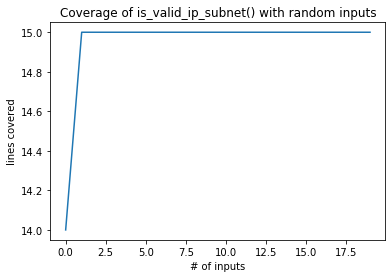

In [92]:
# Plot for pure random approach

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(cumulative_coverage)
plt.title('Coverage of is_valid_ip_subnet() with random inputs')
plt.xlabel('# of inputs')
plt.ylabel('lines covered')

## Smarter Fuzzer for Subnet Calculator


# Credit Card Validator

In [ ]:
# luhn algorithm


class CreditCard:
    def __init__(self, card_no):
        self.card_no = card_no

    @property
    def company(self):
        comp = None
        if str(self.card_no).startswith('4'):
            comp = 'Visa Card'
        elif str(self.card_no).startswith(('50', '67', '58', '63',)):
            comp = 'Maestro Card'
        elif str(self.card_no).startswith('5'):
            comp = 'Master Card'
        elif str(self.card_no).startswith('37'):
            comp = 'American Express Card'
        elif str(self.card_no).startswith('62'):
            comp = 'Unionpay Card'
        elif str(self.card_no).startswith('6'):
            comp = 'Discover Card'
        elif str(self.card_no).startswith('35'):
            comp = 'JCB Card'
        elif str(self.card_no).startswith('7'):
            comp = 'Gasoline Card'

        return 'Company : ' + comp

    def first_check(self):
        if 13 <= len(self.card_no) <= 19:
            message = "First check : Valid in terms of length."

        else:
            message = "First check : Check Card number once again it must be of 13 or 16 digits long."
        return message

    def validate(self):
        # double every second digit from right to left
        sum_ = 0
        crd_no = self.card_no[::-1]
        for i in range(len(crd_no)):
            if i % 2 == 1:
                double_it = int(crd_no[i]) * 2

                if len(str(double_it)) == 2:
                    sum_ += sum([eval(i) for i in str(double_it)])

                else:
                    sum_ += double_it

            else:
                sum_ += int(crd_no[i])

        if sum_ % 10 == 0:
            response = "Valid Card"
        else:
            response = 'Invalid Card'

        return response

    @property
    def checksum(self):
        return '#CHECKSUM# : ' + self.card_no[-1]

    @classmethod
    def set_card(cls, card_to_check):
        return cls(card_to_check)


card_number = input()
card = CreditCard.set_card(card_number)
print(card.company)
print('Card : ', card.card_no)
print(card.first_check())
print(card.checksum)
print(card.validate())

# 79927398713
# 4388576018402626
# 379354508162306


# RSA algorithm

In [10]:

import random
max_PrimLength = 1000000000000

'''
calculates the modular inverse from e and phi
'''
def egcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        g, y, x = egcd(b % a, a)
        return (g, x - (b // a) * y, y)

'''
calculates the gcd of two ints
'''
def gcd(a, b):
    while b != 0:
        a, b = b, a % b
    return a

'''
checks if a number is a prime
'''
def is_prime(num):
    if num == 2:
        return True
    if num < 2 or num % 2 == 0:
        return False
    for n in range(3, int(num**0.5)+2, 2):
        if num % n == 0:
            return False
    return True

def generateRandomPrim():
    while(1):
        ranPrime = random.randint(0,max_PrimLength)
        if is_prime(ranPrime):
            return ranPrime

def generate_keyPairs():
    p = generateRandomPrim()
    q = generateRandomPrim()
    
    n = p*q
    print("n ",n)
    '''phi(n) = phi(p)*phi(q)'''
    phi = (p-1) * (q-1) 
    print("phi ",phi)
    
    '''choose e coprime to n and 1 > e > phi'''    
    e = random.randint(1, phi)
    g = gcd(e,phi)
    while g != 1:
        e = random.randint(1, phi)
        g = gcd(e, phi)
        
    print("e=",e," ","phi=",phi)
    '''d[1] = modular inverse of e and phi'''
    d = egcd(e, phi)[1]
    
    '''make sure d is positive'''
    d = d % phi
    if(d < 0):
        d += phi
        
    return ((e,n),(d,n))
        
def decrypt(ctext,private_key):
    try:
        key,n = private_key
        text = [chr(pow(char,key,n)) for char in ctext]
        return "".join(text)
    except TypeError as e:
        print(e)

def encrypt(text,public_key):
    key,n = public_key
    ctext = [pow(ord(char),key,n) for char in text]
    return ctext

if __name__ == '__main__':
    public_key,private_key = generate_keyPairs() 
    print("Public: ",public_key)
    print("Private: ",private_key)
    
    ctext = encrypt("Heya",public_key)
    print("encrypted  =",ctext)
    plaintext = decrypt(ctext, private_key)
    print("decrypted =",plaintext)

n  72917873361068952384803
phi  72917873360523426507048
e= 67262308119153331459999   phi= 72917873360523426507048
Public:  (67262308119153331459999, 72917873361068952384803)
Private:  (67531184136529517005663, 72917873361068952384803)
encrypted  = [24212264725635597495479, 47638346824408407688492, 48512034843472012381990, 40080404889542166675623]
decrypted = Heya
